# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint as pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#mock_city = 0
city_name = []
city= []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wnd_speed= []
country = []
date = []


url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = url + "appid=" + weather_api_key + "&q=" 

for x in range(len(cities)):
    print(x,cities[x])
    city_response = requests.get(query_url + cities[x]).json()
    try:
        city_name.append(city_response['name'])
        lat.append(city_response['coord']['lat'])
        lng.append(city_response['coord']['lon'])
        max_temp.append(city_response['main']['temp_max'])
        humidity.append(city_response['main']['humidity'])
        cloudiness.append(city_response['clouds']['all'])
        wnd_speed.append(city_response['wind']['speed'])
        country.append(city_response['sys']['country'])
        date.append(city_response['dt'])
    except KeyError:
        print('City information not found.')
    


   

    
    
  
   

0 punta arenas
1 toliary
City information not found.
2 jacareacanga
3 rikitea
4 sao joao da barra
5 vaini
6 ituni
City information not found.
7 vytegra
8 albany
9 necocli
10 lagoa
11 port alfred
12 tuatapere
13 mar del plata
14 yei
15 torbay
16 atuona
17 hithadhoo
18 yellowknife
19 kralendijk
20 severo-kurilsk
21 qaqortoq
22 busselton
23 nanortalik
24 lebu
25 ilulissat
26 olinala
27 provideniya
28 bolungarvik
City information not found.
29 charters towers
30 kahului
31 hambantota
32 tawkar
City information not found.
33 vila velha
34 swellendam
35 nuevo progreso
36 lasa
37 nanakuli
38 saleaula
City information not found.
39 adrar
40 naze
41 hasaki
42 dikson
43 ushuaia
44 los llanos de aridane
45 ahipara
46 klaksvik
47 hobart
48 husavik
49 belaya gora
50 bukoba
51 sur
52 mataura
53 hofn
54 fortuna
55 moree
56 illoqqortoormiut
City information not found.
57 santander
58 itarema
59 atar
60 attawapiskat
City information not found.
61 lorengau
62 butaritari
63 nikolskoye
64 channel-port aux

In [5]:
city_response

{'coord': {'lon': 41.81, 'lat': 53.44},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 272.3,
  'feels_like': 266.92,
  'temp_min': 272.3,
  'temp_max': 272.3,
  'pressure': 1026,
  'humidity': 94,
  'sea_level': 1026,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 4.51, 'deg': 324},
 'clouds': {'all': 32},
 'dt': 1605065519,
 'sys': {'country': 'RU', 'sunrise': 1605069071, 'sunset': 1605100955},
 'timezone': 10800,
 'id': 525138,
 'name': 'Morshansk',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
'''city_data= {'City':[city_name],'Lat':[lat], 'Lng':[lng], 
            'Max Temp':[max_temp], 'Humidity':[humidity], 
            'Cloudiness':[cloudiness], 'Wind Speed':[wnd_speed], 
            'Country':[country], 'Date':[date]}
'''

city_data_df= pd.DataFrame()
city_data_df['City'] = city_name
city_data_df['Lat'] = lat
city_data_df['Lng'] = lng
city_data_df['Max Temp'] = max_temp
city_data_df['Humidity'] = humidity
city_data_df['Cloudiness'] = cloudiness
city_data_df['Wind Speed'] = wnd_speed
city_data_df['Country'] = country
city_data_df['Date'] = date


city_data_df.to_csv(r'city_data_df.csv')

city_data_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,286.15,71,75,5.10,CL,1605065360
1,Jacareacanga,-6.22,-57.75,296.03,89,64,0.44,BR,1605065360
2,Rikitea,-23.12,-134.97,296.17,79,9,8.98,PF,1605065360
3,São João da Barra,-21.64,-41.05,296.46,91,100,4.90,BR,1605065360
4,Vaini,-21.20,-175.20,300.15,74,20,4.60,TO,1605065361


In [11]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,5.350000e+02
mean,18.731832,15.043028,287.348299,74.699065,49.927103,3.391645,1.605065e+09
std,33.762797,91.157024,13.298663,19.851252,39.866776,2.483049,9.144641e+01
min,-54.800000,-175.200000,245.040000,9.000000,0.000000,0.160000,1.605065e+09
25%,-9.935000,-62.855000,278.660000,66.000000,4.000000,1.500000,1.605065e+09
50%,21.230000,18.420000,290.370000,80.000000,47.000000,2.680000,1.605065e+09
75%,46.775000,94.385000,297.890000,90.000000,90.000000,4.600000,1.605065e+09
max,78.220000,179.320000,312.150000,100.000000,100.000000,13.900000,1.605066e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [23]:
import matplotlib.pyplot as plt



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

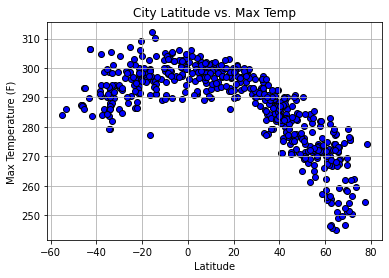

In [31]:
plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black")
plt.title('City Latitude vs. Max Temp')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

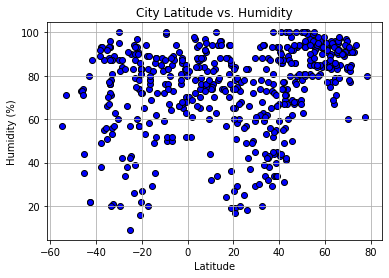

In [32]:
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black")
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

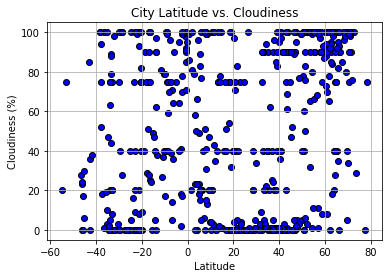

In [33]:
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black")
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

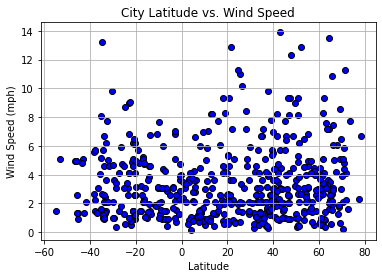

In [34]:
plt.scatter(lat, wnd_speed, marker="o", facecolors="blue", edgecolors="black")
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


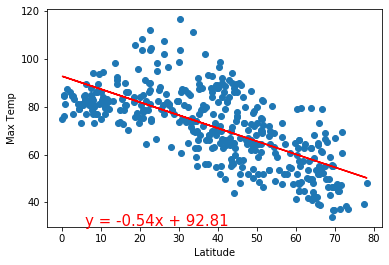

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


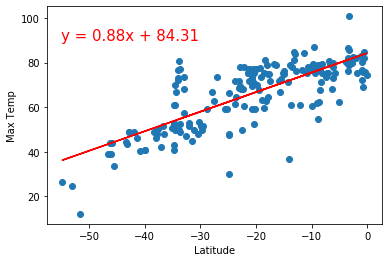

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


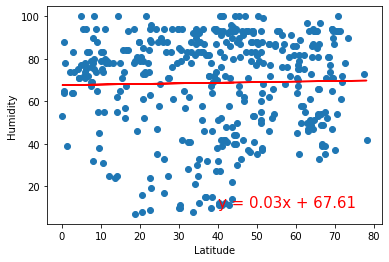

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


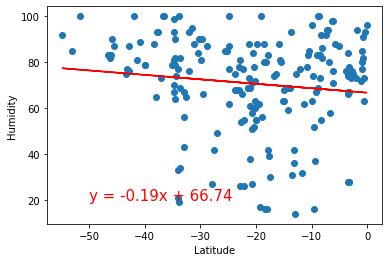

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


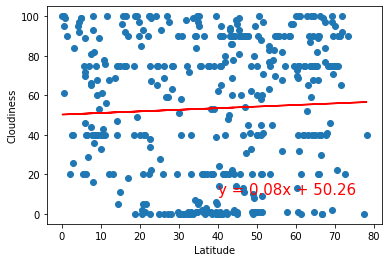

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


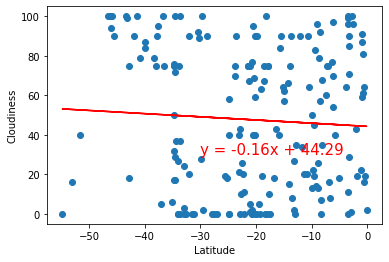

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


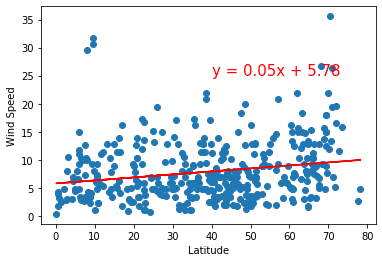

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


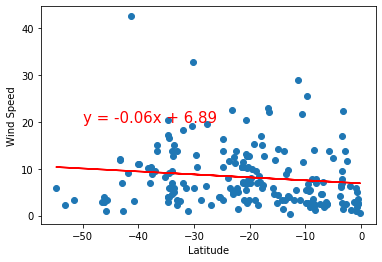